## 1. Imports and Paths

In [1]:
# Playing with labeled image data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from kp_descriptor_fns import overlay_bboxes, HarrisKeypointDetector, SimpleFeatureDescriptor, ORB_SIFT_FeatureDescriptor

In [2]:
# Define directories
base_dir = '/Users/jetcalz07/Desktop/MIDS/W281_CV/logo_detection_w281/'
image_dir = base_dir + 'data/images/'
bbox_dir = base_dir + 'data/yolofinalset/obj_train_data/'

## 2. Load Example for Dev

In [3]:
# Load list of train images
with open(base_dir + 'data/yolofinalset/train.txt') as f:
    train = f.readlines()
train = [x.replace('\n', '').split('/')[-1] for x in train]

# Load first image, template, bounding boxes
z = 0
img_file = image_dir + train[z]
img_bbox_file = bbox_dir +  train[z].replace('.jpg', '.txt')

## 3. Given image, bbox file paths.. load img and overlay the bounding boxes

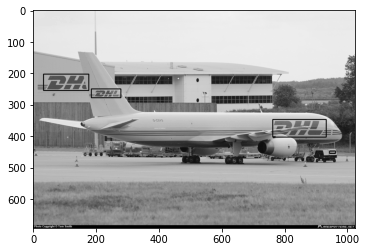

In [4]:
# Extract bbox subset from image for feature extraction
im_gray, im_bboxes, bboxes, label = overlay_bboxes(img_file, img_bbox_file)
plt.imshow(im_bboxes, cmap='gray')

#### 3.1 View each box for image

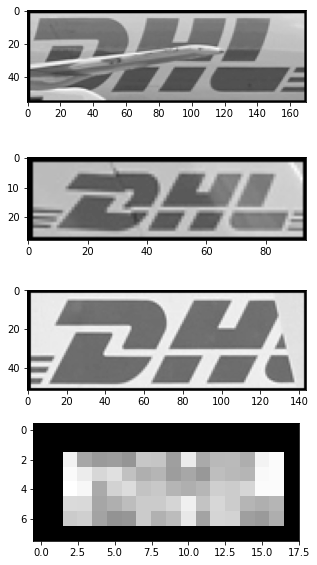

In [5]:
# Extract a single box so that we can extract features
fig, ax = plt.subplots(len(bboxes), 1, figsize=(5, 10))

for i in range(len(bboxes)):
    x_min, x_max, y_min, y_max = bboxes[i]
    img_bbox = im_bboxes[y_min:y_max, x_min:x_max]
    ax[i].imshow(img_bbox, cmap='gray')

## TODO: manipulate image in each bbox

## 4. Feature Extraction - Harris Corners

In [6]:
# Extract a single box so that we can extract features
i = 1 # box number
x_min, x_max, y_min, y_max = bboxes[i]
img_bbox = im_gray[y_min:y_max, x_min:x_max]

# keypoints, feature descriptors
harris_kp = HarrisKeypointDetector(img_bbox, n=2, w=3, k=0.04, p=0.9, verbose=False)
simple_feature = SimpleFeatureDescriptor(img_bbox, harris_kp, w=5)
harris_orb_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = True, use_harris=True, nfeatures=10, harris_kp=harris_kp)
orb_kp_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = True, use_harris=False, nfeatures=10, harris_kp=None)
harris_sift_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = False, use_harris=True, nfeatures=10, harris_kp=harris_kp)
sift_kp_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = False, use_harris=False, nfeatures=10, harris_kp=None)

## 5. Run all bbox loop, format and append to DF (one row per bbox feature set)

In [7]:
# Init DF
df = pd.DataFrame({
    'img_file': pd.Series(dtype='str'),
    'bbox_file': pd.Series(dtype='str'),
    'label':  pd.Series(dtype='int'),
    'bbox_num': pd.Series(dtype='int'),
    'bbox_corners': pd.Series(dtype='int'),
    'simple_feature': pd.Series(dtype='float32'),
    'harris_orb_feature': pd.Series(dtype='float32'),
    'orb_kp_feature': pd.Series(dtype='float32'),
    'harris_sift_feature': pd.Series(dtype='float32'),
    'sift_kp_feature': pd.Series(dtype='float32'),
    })

# Load first image, template, bounding boxes
for z in range(len(train)):
    img_file = image_dir + train[z]
    img_bbox_file = bbox_dir +  train[z].replace('.jpg', '.txt')

    # Load image, overlay bboxes
    im_gray, im_bboxes, bboxes, label = overlay_bboxes(img_file, img_bbox_file)

    # loop through each box, get features and append to df row
    for i in range(len(bboxes)):
        x_min, x_max, y_min, y_max = bboxes[i]
        img_bbox = im_bboxes[y_min:y_max, x_min:x_max]

        # get keyopints and feature descriptors
        harris_kp = HarrisKeypointDetector(img_bbox, n=2, w=3, k=0.04, p=0.9, verbose=False)
        simple_feature = SimpleFeatureDescriptor(img_bbox, harris_kp, w=5)
        harris_orb_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = True, use_harris=True, nfeatures=10, harris_kp=harris_kp)
        orb_kp_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = True, use_harris=False, nfeatures=10, harris_kp=None)
        harris_sift_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = False, use_harris=True, nfeatures=10, harris_kp=harris_kp)
        sift_kp_feature = ORB_SIFT_FeatureDescriptor(img_bbox, use_orb = False, use_harris=False, nfeatures=10, harris_kp=None)

        # append to df
        row = {
            'img_file': train[z],
            'bbox_file': train[z].replace('.jpg', '.txt'),
            'label': label,
            'bbox_num': i+1,
            'bbox_corners': np.array(bboxes, dtype='int'),
            'simple_feature': simple_feature,
            'harris_orb_feature': harris_orb_feature,
            'orb_kp_feature': orb_kp_feature,
            'harris_sift_feature': harris_sift_feature,
            'sift_kp_feature': sift_kp_feature,
            }
        df = df.append(row, ignore_index=True)

# display
print(len(df))
df.head()

1641


,img_file,bbox_file,label,bbox_num,bbox_corners,simple_feature,harris_orb_feature,orb_kp_feature,harris_sift_feature,sift_kp_feature
0,002837.jpg,002837.txt,1.0,1,"[[762, 932, 347, 403], [185, 279, 250, 278], [...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[133, 5, 14, 178, 133, 237, 35, 232, 80, 210,...","[[22, 108, 189, 147, 148, 31, 254, 198, 102, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[24.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 167..."
1,002837.jpg,002837.txt,1.0,2,"[[762, 932, 347, 403], [185, 279, 250, 278], [...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[7, 13, 74, 146, 134, 185, 38, 227, 90, 64, 1...","[[29, 92, 93, 110, 27, 228, 82, 59, 197, 72, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0,..."
2,002837.jpg,002837.txt,1.0,3,"[[762, 932, 347, 403], [185, 279, 250, 278], [...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[3, 147, 6, 162, 164, 143, 176, 102, 72, 81, ...","[[40, 28, 59, 78, 82, 228, 179, 82, 84, 28, 62...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 131..."
3,002837.jpg,002837.txt,1.0,4,"[[762, 932, 347, 403], [185, 279, 250, 278], [...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[135, 2, 0, 162, 197, 21, 123, 56, 113, 193, ...","[[162, 21, 204, 66, 125, 195, 157, 24, 11, 68,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",None
4,002836.jpg,002836.txt,1.0,1,"[[751, 773, 300, 306], [827, 849, 293, 299], [...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[181, 153, 92, 144, 166, 235, 4, 227, 226, 21...",None,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",None


In [8]:
harris_orb_feature.shape

(5, 32)